Постройте простую экономическую модель для оценки эффекта от внедрения полученного решения на практике.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import warnings as wrn
wrn.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


 Введем следующие параметры в модель оценки внедрения решения на платформе:
* ARPU - Average revenue per user средняя выручка от одного пользователя, пусть будет 500 р.
* MHPU - Money hold per user Кол-во денег, которое мы будем вкладывать в его удержание, пусть будет 50 р
* PoA = Probability of accept - вероятность, что предложение будет принято им, пусть будет 0.6

1. Введите еще несколько параметров и на их основе постройте простую экономическую модель: формулу по которой в зависимости от значения исходных параметров вы сможете рассчитать экономический эффект от проведения кампании (сколько денег вы получили или  потеряли от проведения кампании по удержанию) с использование вашей модели.

* TP - количество верно определенных пользователей склонных к оттоку 
* FP - количество неверно определенных пользователей склонных к оттоку

$$Revenue= ARPU \cdot TP\cdot PoA - MHPU\cdot (FP + TP) $$



2.  Исходя из введенных параметров проанализируйте, какой топ пользователей, склонных к оттоку согласно модели, оптимально выбрать для проведения кампании по удержанию для таким образом, чтобы экономический эффект был наибольшим? 

In [3]:
df_res=pd.read_csv("economic.csv",index_col =0)
#загрузим наш датасет из предыдущего задания с истинными метками и предсказанными

In [4]:
churn_det = df_res[df_res["pred"] > 0.5].sort_values('labels', ascending=False)
#удалим те строки где pred == 0, т.к. FN, TN нас не интересуют

In [5]:
TPs=churn_det["labels"].values.cumsum()
FPs=1 + np.arange(len(churn_det)) - TPs
#создадим ряды с накопленной суммой TP, FP

In [6]:
#функция для подсчета прибыли
def revenue(mhpu, poa, top_percent):
    TP = TPs[top_percent * len(TPs)//100]
    FP = FPs[top_percent * len(FPs)//100]   
    arpu=500
    return arpu * (TP * poa) - mhpu * (TP + FP)

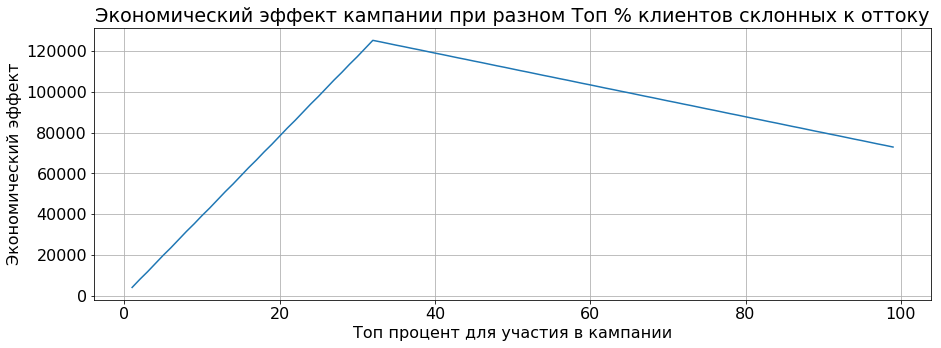

Наибольшая прибыль 125250.00 от кампании достигается при Топ 31 % пользователей склонных к оттоку согласно модели


In [10]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(15,5))
perc = 1 + np.arange(99)
plt.plot(perc, revenue(50, 0.6, perc))
plt.grid()
plt.title("Экономический эффект кампании при разном Топ % клиентов склонных к оттоку")
plt.xlabel("Топ процент для участия в кампании")
plt.ylabel("Экономический эффект")
best_perc=np.argmax(revenue(50, 0.6, perc))
max_rev=revenue(50, 0.6, perc)[best_perc]
plt.show()
print("Наибольшая прибыль {:1.2f} от кампании достигается при Топ {:d} % пользователей склонных к оттоку согласно модели".format(max_rev, best_perc))

3. Попробуйте усложнить экономическую модель. Добавьте еще несколько параметров и поиграйте с ними (например, измените стоимость удержания и вероятность, с которой пользователь принимает предложение), проанализируйте как меняется оптимальный размер топа? 

PoA = 0.8

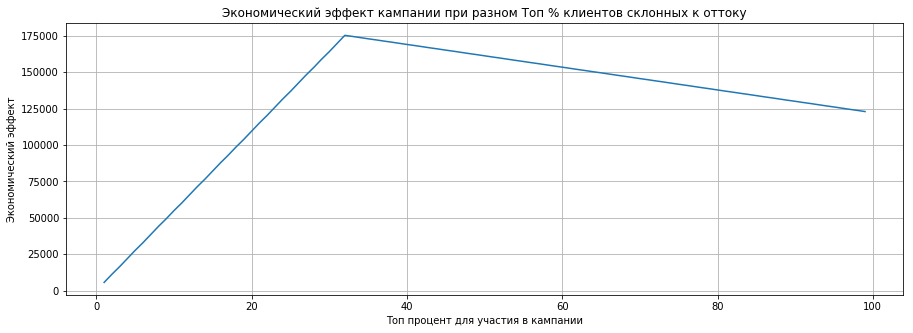

Наибольшая прибыль 175350.00 от кампании достигается при Топ 31 % пользователей склонных к оттоку согласно модели


In [7]:
plt.figure(figsize=(15,5))
perc = 1 + np.arange(99)
plt.plot(perc, revenue(50, 0.8, perc))
plt.grid()
plt.title("Экономический эффект кампании при разном Топ % клиентов склонных к оттоку")
plt.xlabel("Топ процент для участия в кампании")
plt.ylabel("Экономический эффект")
best_perc=np.argmax(revenue(50 ,0.8, perc))
max_rev=revenue(50, 0.8, perc)[best_perc]
plt.show()
print("Наибольшая прибыль {:1.2f} от кампании достигается при Топ {:d} % пользователей склонных к оттоку согласно модели".format(max_rev, best_perc))

PoA = 1

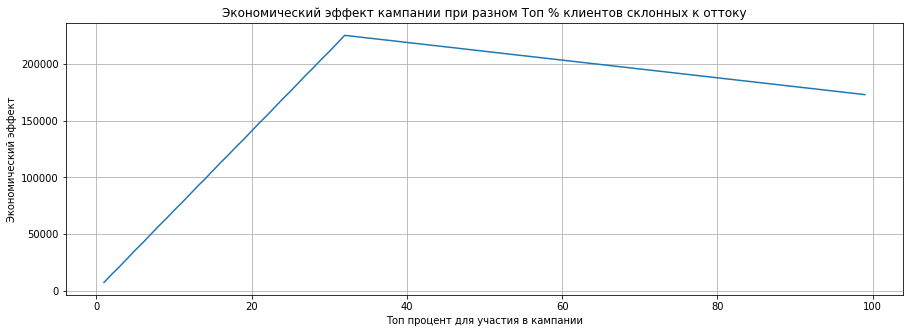

Наибольшая прибыль 225450.00 от кампании достигается при Топ 31 % пользователей склонных к оттоку


In [10]:
plt.figure(figsize=(15,5))
perc = 1 + np.arange(99)
plt.plot(perc, revenue(50, 1, perc))
plt.grid()
plt.title("Экономический эффект кампании при разном Топ % клиентов склонных к оттоку")
plt.xlabel("Топ процент для участия в кампании")
plt.ylabel("Экономический эффект")
best_perc=np.argmax(revenue(50 ,1, perc))
max_rev=revenue(50, 1, perc)[best_perc]
plt.show()
print("Наибольшая прибыль {:1.2f} от кампании достигается при Топ {:d} % пользователей склонных к оттоку".format(max_rev, best_perc))

Видим, что при увеличении вероятности принятия предложения увеличивается наибольшая прибыль от кампании. Это логично исходя из нашей формулы прибыли. Оптимальный размер топа остается не изменным.

MHPU = 150

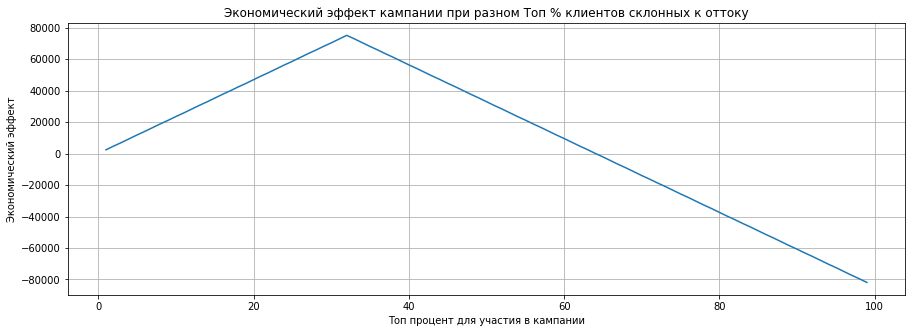

Наибольшая прибыль 75150.00 от кампании


In [11]:
plt.figure(figsize=(15,5))
perc = 1 + np.arange(99)
plt.plot(perc, revenue(150, 0.6, perc))
plt.grid()
plt.title("Экономический эффект кампании при разном Топ % клиентов склонных к оттоку")
plt.xlabel("Топ процент для участия в кампании")
plt.ylabel("Экономический эффект")
best_perc=np.argmax(revenue(150 ,0.6, perc))
max_rev=revenue(150, 0.6, perc)[best_perc]
plt.show()
print("Наибольшая прибыль {:1.2f} от кампании".format(max_rev))

MHPU = 250

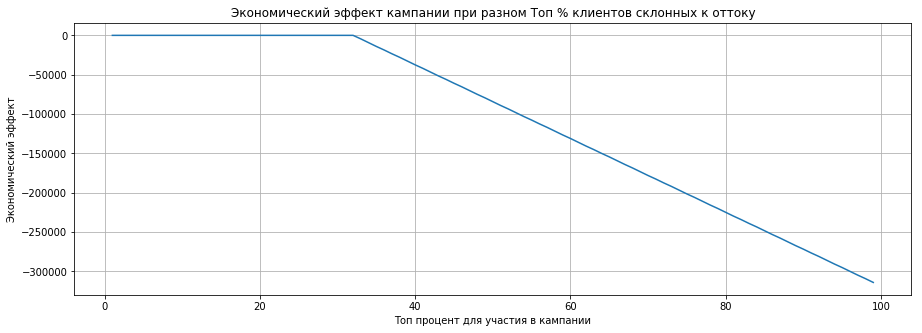

Наибольшая прибыль 0.00 от кампании


In [12]:
plt.figure(figsize=(15,5))
perc = 1 + np.arange(99)
plt.plot(perc, revenue(300, 0.6, perc))
plt.grid()
plt.title("Экономический эффект кампании при разном Топ % клиентов склонных к оттоку")
plt.xlabel("Топ процент для участия в кампании")
plt.ylabel("Экономический эффект")
best_perc=np.argmax(revenue(300 ,0.6, perc))
max_rev=revenue(300, 0.6, perc)[best_perc]
plt.show()
print("Наибольшая прибыль {:1.2f} от кампании".format(max_rev))

Видим если значение MHPU будет >= 300, то от нашей модели не будет экономичсекого эффекта.

4. Всегда ли применение модели экономически оправданно? Приведите пример набора значений параметров, при которых применение модели перестает быть оправданным.

Выше я уже показал при каких параметрах применение модели не будет экономически оправданно.

5. Оцените изменение экономического эффекта от проведения кампании по удержанию при увеличении качества модели на 1%? На 3%? При ответе на вопрос укажите, по какой метрике вы оцениваете качество.

Наша экономическая модель зависист от количества TP, FP. Качество будем оценивать по метрике precision.

In [152]:
#функция для подсчета прибыли при увеличении precision
def revenue_improove_precision(mhpu, poa, top_percent, im_pr = 0):
    TP = TPs[top_percent * len(TPs)//100]
    FP = FPs[top_percent * len(FPs)//100]
    
    if (im_pr > 0):
        precision = TP / (TP + FP)
        TP = precision * (1 + im_pr) * top_percent * len(FPs)/100
        FP = top_percent * len(FPs)/100 - TP
        
    arpu=500
    return arpu * (TP * poa) - mhpu * (TP + FP)

In [150]:
perc = 1 + np.arange(99)
best_perc = np.argmax(revenue(50, 0.6, perc))
max_rev = revenue(50 ,0.6, perc)[best_perc]
print('Прибыль без изменения precision: {:1.2f}'.format(max_rev))

Прибыль без изменения precision: 125250.00


In [154]:
max_rev = revenue_improove_precision(50 ,0.6, perc, im_pr=0.1)[best_perc]
print('Прибыль с увеличением  precision на 1%: {:1.2f}'.format(max_rev))

Прибыль с увеличением  precision на 1%: 140044.80


In [156]:
max_rev = revenue_improove_precision(50 ,0.6, perc, im_pr=0.3)[best_perc]
print('Прибыль с увеличением  precision на 3%: {:1.2f}'.format(max_rev))

Прибыль с увеличением  precision на 3%: 170054.40


6. Как вы думаете, является ли экономически оправданным вложение средств в улучшение качества модели? На сколько нужно улучшить модель, чтобы это качественно сказалось на экономическом эффекте от удержания?

Я считаю, что вложение средств в улучшение качества модели является экокномичеки оправданным. Увеличение precision на 3% увеличило прибыль от кампании по удержанию клиентов на 35%.